# K Nearest Neighbour Classification Algorithm

# Importing Modules and DataFrame

In [24]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
df2 = pd.read_csv('Pre-processed Data.csv')
df2.head()

,card,reports,income,share
0,1,0,4.5200,0.033270
1,1,0,2.4200,0.005217
2,1,0,4.5000,0.004156
3,1,0,2.5400,0.065214
4,1,0,9.7867,0.067051


In [26]:
df2.corr()

,card,reports,income,share
card,1.000000,-0.452577,0.094308,0.388028
reports,-0.452577,1.000000,0.011023,-0.159011
income,0.094308,0.011023,1.000000,-0.054429
share,0.388028,-0.159011,-0.054429,1.000000


In [27]:
X2 = df2.drop('card',axis=1)
X2.head()

# Indpendent Variabales

,reports,income,share
0,0,4.5200,0.033270
1,0,2.4200,0.005217
2,0,4.5000,0.004156
3,0,2.5400,0.065214
4,0,9.7867,0.067051


In [28]:
y2 = df2.card
y2.head()

# Target Variable

0    1
1    1
2    1
3    1
4    1
Name: card, dtype: int64

In [29]:
# Standardize Data
# Create standardizer
standardizer = StandardScaler()

In [30]:
# Standardize features
X_std = standardizer.fit_transform(X2)
print (X_std[:5])

[[-0.3393968   0.68189427 -0.3747874 ]
 [-0.3393968  -0.55831728 -0.67126874]
 [-0.3393968   0.67008274 -0.68248613]
 [-0.3393968  -0.48744805 -0.03718458]
 [-0.3393968   3.7922858  -0.01777202]]


/home/ujaan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ujaan/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [31]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1).fit(X_std, y2)

In [32]:
pipe = Pipeline([('standardizer', standardizer), ('knn', knn)])
print ("pipe : ", pipe)

# Create space of candidate values
search_space = [{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

pipe :  Pipeline(memory=None,
     steps=[('standardizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))])


In [33]:
# Search Over Possible Values of k
# Create grid search GridSearchCV implements a “fit” and a “score” method.
# The parameters of the estimator used to apply these methods are optimizedby cross-validated grid-search over a parameter grid. 
clf = GridSearchCV(pipe, search_space, cv=5, verbose=1).fit(X_std, y2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   28.8s finished


In [34]:
# View k For Best Performing Model
# Best neighborhood size (k)
clf.best_estimator_.get_params()['knn__n_neighbors']

5

In [35]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=101)

In [36]:
knn2 = KNeighborsClassifier(n_neighbors=5,metric='euclidean',n_jobs=2)
knn2.fit(X2_train,y2_train)
score2 = knn2.score(X2_train,y2_train)*100
print ("\nScore:", score2)


Score: 91.10212335692619


In [37]:
pred2 = knn2.predict(X2_test)
pred2[0:5]

array([1, 1, 1, 1, 0])

In [38]:
pred_proba2 = knn2.predict_proba(X2_test)
pred_proba2[:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [39]:
pd.crosstab(index=y2_test,columns=pred2,rownames = ["Actual Value"],
           colnames = ["Predicted Value"])

Predicted Value,0,1
Actual Value,,
0,43,21
1,24,242


In [40]:
# Precision = TP/(TP + FP)
# Precision measures how many of the samples 
# predicted as positive are actually positive
# Precision is also known as positive predictive value (PPV)

# Recall = TP/(TP + FN)
# measures how many of the positive samples are captured
# by the positive predictions:
# Other names for recall are sensitivity, hit rate,
# or true positive rate (TPR).

# F1-score = 2 x (precision x recall)/(precision + recall)
# f-score or f-measure, which is with the harmonic mean of
# precision and recall

print(metrics.classification_report(y2_test,pred2))

              precision    recall  f1-score   support

           0       0.64      0.67      0.66        64
           1       0.92      0.91      0.91       266

   micro avg       0.86      0.86      0.86       330
   macro avg       0.78      0.79      0.79       330
weighted avg       0.87      0.86      0.86       330



In [41]:
accuracy_knn2 = metrics.accuracy_score(y2_test,pred2)*100
print("Accurate Score of this model: %2.5f"%accuracy_knn2)

Accurate Score of this model: 86.36364


In [44]:
print("MAE: ", metrics.mean_absolute_error(y2_test,pred2))
print("MSE: ",metrics.mean_squared_error(y2_test,pred2))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y2_test,pred2)))

MAE:  0.13636363636363635
MSE:  0.13636363636363635
RMSE:  0.3692744729379982


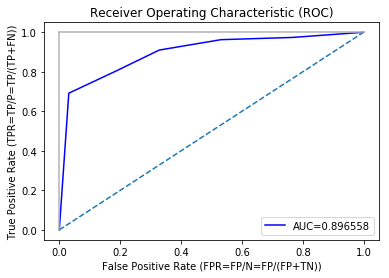

In [46]:
# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates

y2_score = knn2.predict_proba(X2_test)[:,1]
false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(y2_test, y2_score)

# Plot ROC curve
plt.title('Receiver Operating Characteristic (ROC)')
roc_auc = metrics.auc(false_positive_rate,true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate,'b',label="AUC=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate (TPR=TP/P=TP/(TP+FN))')
plt.xlabel('False Positive Rate (FPR=FP/N=FP/(FP+TN))')
plt.show()